# Recommender Systems with Python
#### In this notebook, we'll focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Remember, this is not really a solid recommendation system, to describe it more accurately, it just tells you which movies / items are most similar to your movie selection.

#### Lets start!

# 1) Import libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2) Get the Data

In [29]:
column_names = ["id_user", "item_id", "rate", "timestamp"]

In [30]:
df = pd.read_csv("u.data", sep="\t", names= column_names)
df.head()

,id_user,item_id,rate,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [31]:
movie_titles = pd.read_csv("Movie")

In [32]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# 3) Merging datasets

In [33]:
df = pd.merge(df, movie_titles, on ="item_id")
df.head()

,id_user,item_id,rate,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# 4) Exploratory Data Analysis(EDA)¶
### Let's explore the data a bit and get a look at some of the best rated movies.

In [34]:
sns.set_style("white")

In [40]:
#Finding most rated movies
df.groupby("title")["rate"].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rate, dtype: float64

In [41]:
#Finfing most watched movies
df.groupby("title")["rate"].count().sort_values(ascending=False).head()  

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rate, dtype: int64

In [43]:
ratings = pd.DataFrame(df.groupby("title")["rate"].mean())
ratings.head()

,rate
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [45]:
ratings["num_of_ratings"] = pd.DataFrame(df.groupby("title")["rate"].count())
ratings.head()

,rate,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

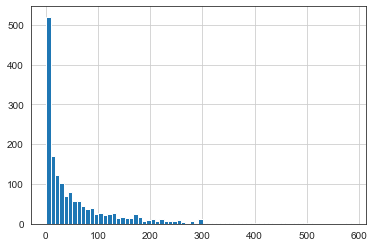

In [46]:
ratings["num_of_ratings"].hist(bins=70)

<AxesSubplot:>

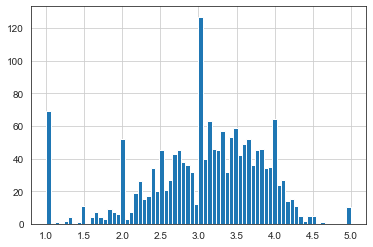

In [47]:
ratings["rate"].hist(bins=70)

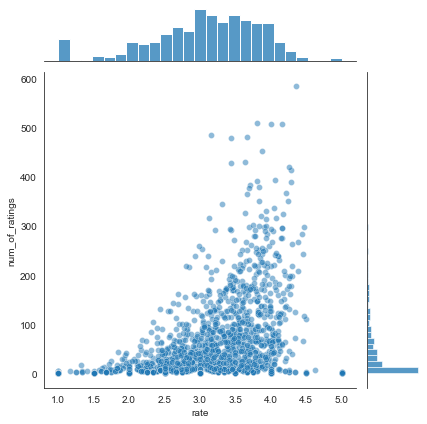

In [52]:
sns.jointplot(x="rate", y="num_of_ratings", data=ratings, alpha=0.5)

# 5) Recommending Similar Movies

### let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [54]:
moviemat = df.pivot_table(index="id_user", columns="title",values="rate")
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
id_user,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
#Most rated movie:
ratings.sort_values("num_of_ratings", ascending=False).head(10)

,rate,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [79]:
#Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.
#let's grab the user ratings for those two movies:

starwars_user_ratings=  moviemat["Star Wars (1977)"]
liarliar_user_ratings = moviemat["Liar Liar (1997)"]

In [80]:
starwars_user_ratings.head()

id_user
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [82]:
#Method to obtain correlations in pandas - Corrwith
#We can then use corrwith() method to get correlations between two pandas series:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)

In [83]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [84]:
#et's clean this by removing NaN values and using a DataFrame instead of a series:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=["Correlation"])
corr_starwars.dropna(inplace=True)

In [85]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [86]:
#Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).
corr_starwars.sort_values("Correlation", ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [87]:
#Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).
corr_starwars = corr_starwars.join(ratings["num_of_ratings"])

In [68]:
corr_starwars.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [88]:
#Now sort the values and notice how the titles make a lot more sense:
corr_starwars[corr_starwars["num_of_ratings"]>100].sort_values("Correlation", ascending=False).head()

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [89]:
#Now the same for the comedy Liar Liar:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=["Correlation"])

In [90]:
corr_liarliar.dropna(inplace=True)

In [91]:
corr_liarliar = corr_liarliar.join(ratings["num_of_ratings"])

In [92]:
corr_liarliar

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
...,...,...
Young Guns (1988),0.410988,101
Young Guns II (1990),0.352174,44
"Young Poisoner's Handbook, The (1995)",0.445016,41


In [76]:
corr_liarliar[corr_liarliar["num_of_ratings"]>100].sort_values("Correlation", ascending=False).head()

,Correlation,num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


# THANK YOU!